##### Copyright 2025 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17), [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-03-25) and [Gemini Flash 2.0 Thinking]() are models that are
trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## 0/ Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../quickstarts/Get_started.ipynb) notebook.

# Sherlock Holmes walked **1 Million Steps** to find something, Guess what it is: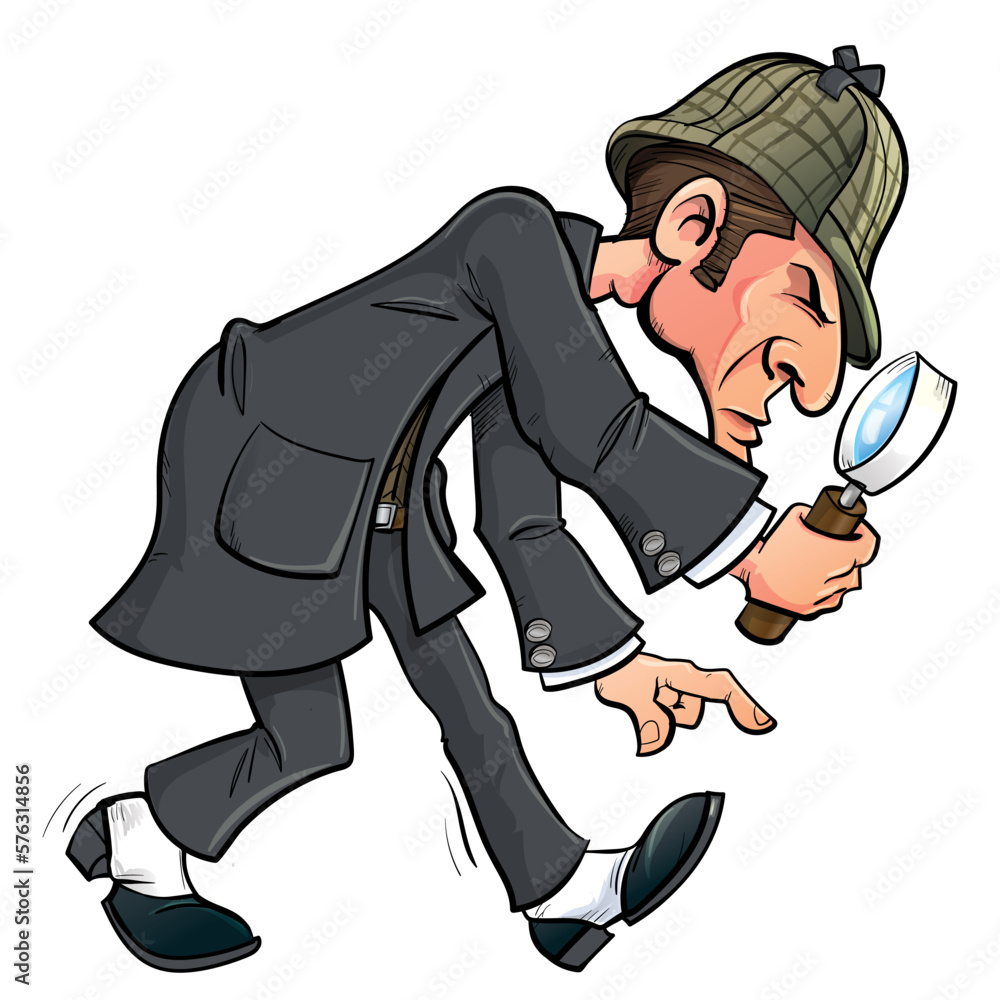

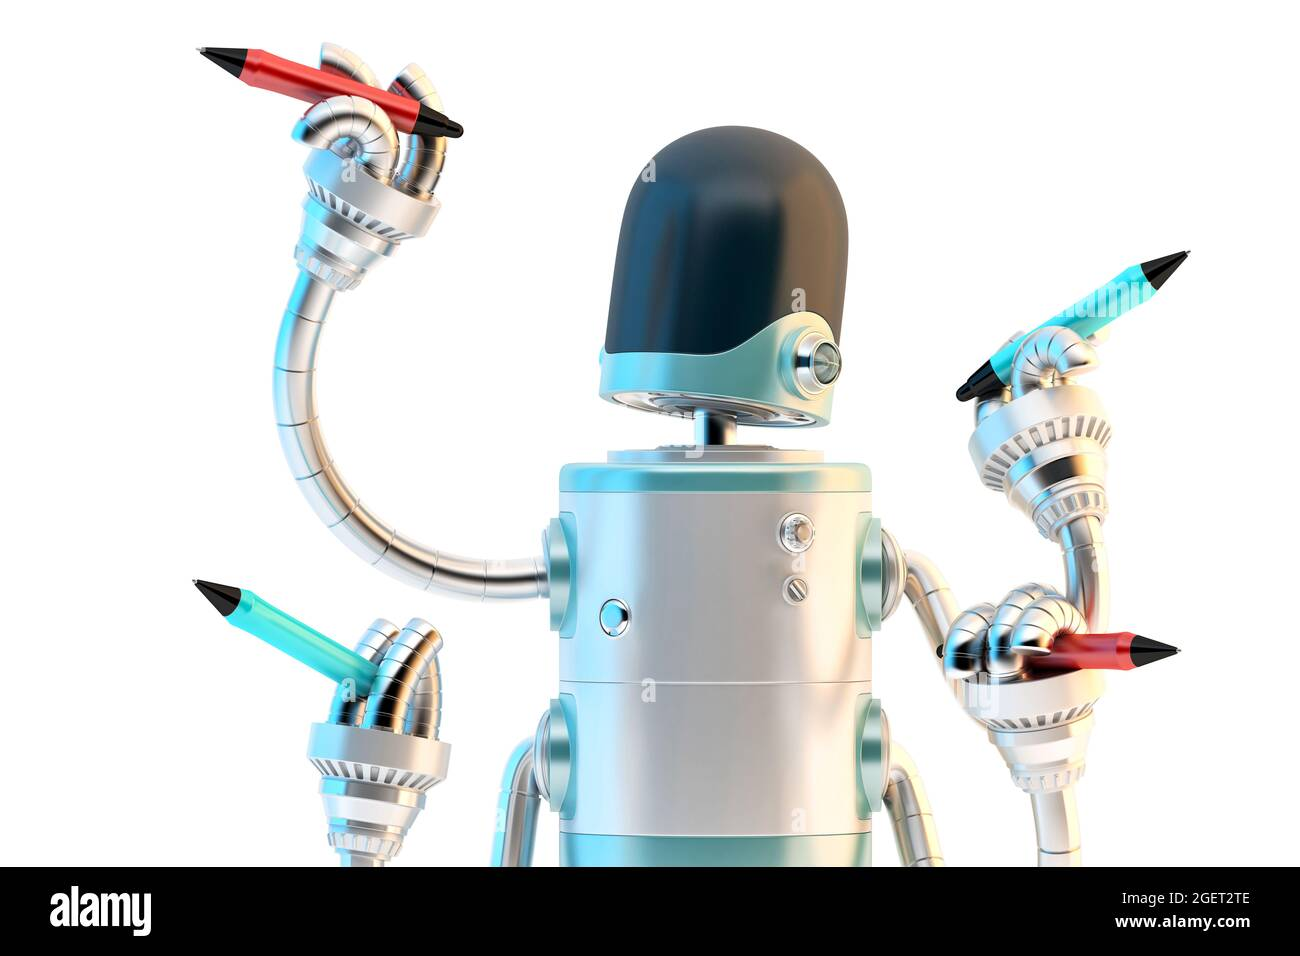


What is Gemini 2.5?

1. "1M Token Bridge" → Long-context

2. "4-Armed Robot" → Multimodal

3. "Sherlock’s Magnifying Glass" → Improved reasoning & accuracy

🔵 Gemini 1.5 (The "Swiss Army Knife" AI)
1️⃣ Long Context (1M Tokens) → 🧠 Imagine a brain reading an entire library at once!
2️⃣ Multimodal Mastery → 🤖 A robot with 4 arms (text, images, audio, code).
3️⃣ File Uploads → 📂 A magic folder eating PDFs, spreadsheets, and videos.

🔵 Gemini 2 (The "Upgraded Brain" AI)
1️⃣ Faster & More Efficient → ⚡ A lightning bolt zapping through tasks.
2️⃣ Better Reasoning → 🔍 Sherlock Holmes with a futuristic AI lens.
3️⃣ Enhanced Coding → 💻 A coder typing at 10x speed with zero bugs.

"Gemini 1.5 is a wise librarian (1M tokens) with 4 tools (multimodal), while Gemini 2 is a cyborg athlete (fast + precise) who codes like a hacker!"*

🔹 Hand Motion Recap:
1.5 → 🤯 Hands stretching wide (long context) + ✋ 4 fingers up (multimodal).

2.0 → 🏃‍♂️ Sprinting motion (speed) + 🤖 Robot arms typing (coding).

💡 When to Use Which?
Pick Gemini 1.5 if: You need long-document analysis or file uploads.

Pick Gemini 2 if: You want speed, precision, or coding excellence.

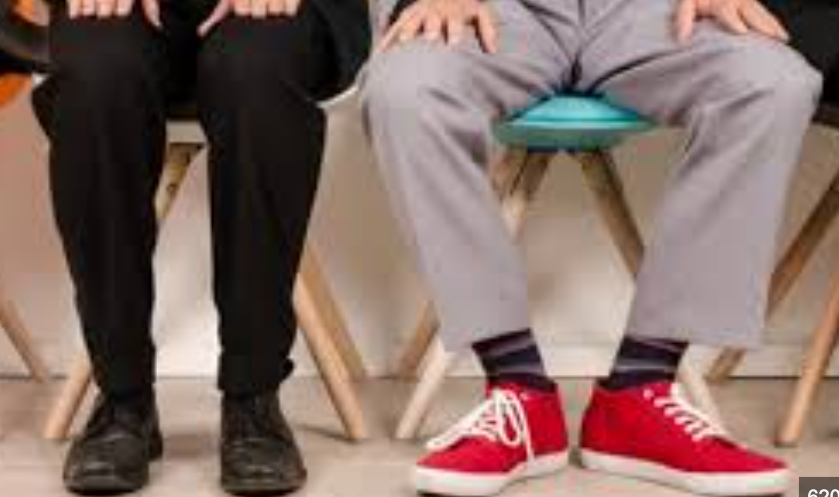

 Key Differences (Side-by-Side)
Feature	Gemini 1.5	Gemini 2
Speed	Fast, but optimized for long context	Blazing fast responses ⚡
Accuracy	Strong logic & analysis	Fewer mistakes, deeper insights 🎯
Coding	Great for debugging & generation	Near-human code refinement 💻
Accessibility	Free tier available (with limits)	Paid tier for advanced features 💰
*(Tip: Picture a race between a "book-smart" 1.5 and a "street-smart" 2.0!)*

[Detailes on Gemini Models](https://ai.google.dev/gemini-api/docs/models)


Gemini API features

The Gemini models can:



1.   Generate text
2.   Generate images
3.   See images and video
4.   Analyze and process audio
5.   Turn text into speech
6.   Turn speech into text


Not all models can run these tasks, so check out the capabilities of each one on the [technical specifications page](https://ai.google.dev/gemini-api/docs/models). I'll break down what each model can do in the next section.

**Step 1: Create a Google AI Studio account**
1. Go to the [Gemini API website](https://aistudio.google.com/app/apikey), and click Sign In to Google AI Studio. Follow the steps to create a new account or sign in with your existing Google credentials.
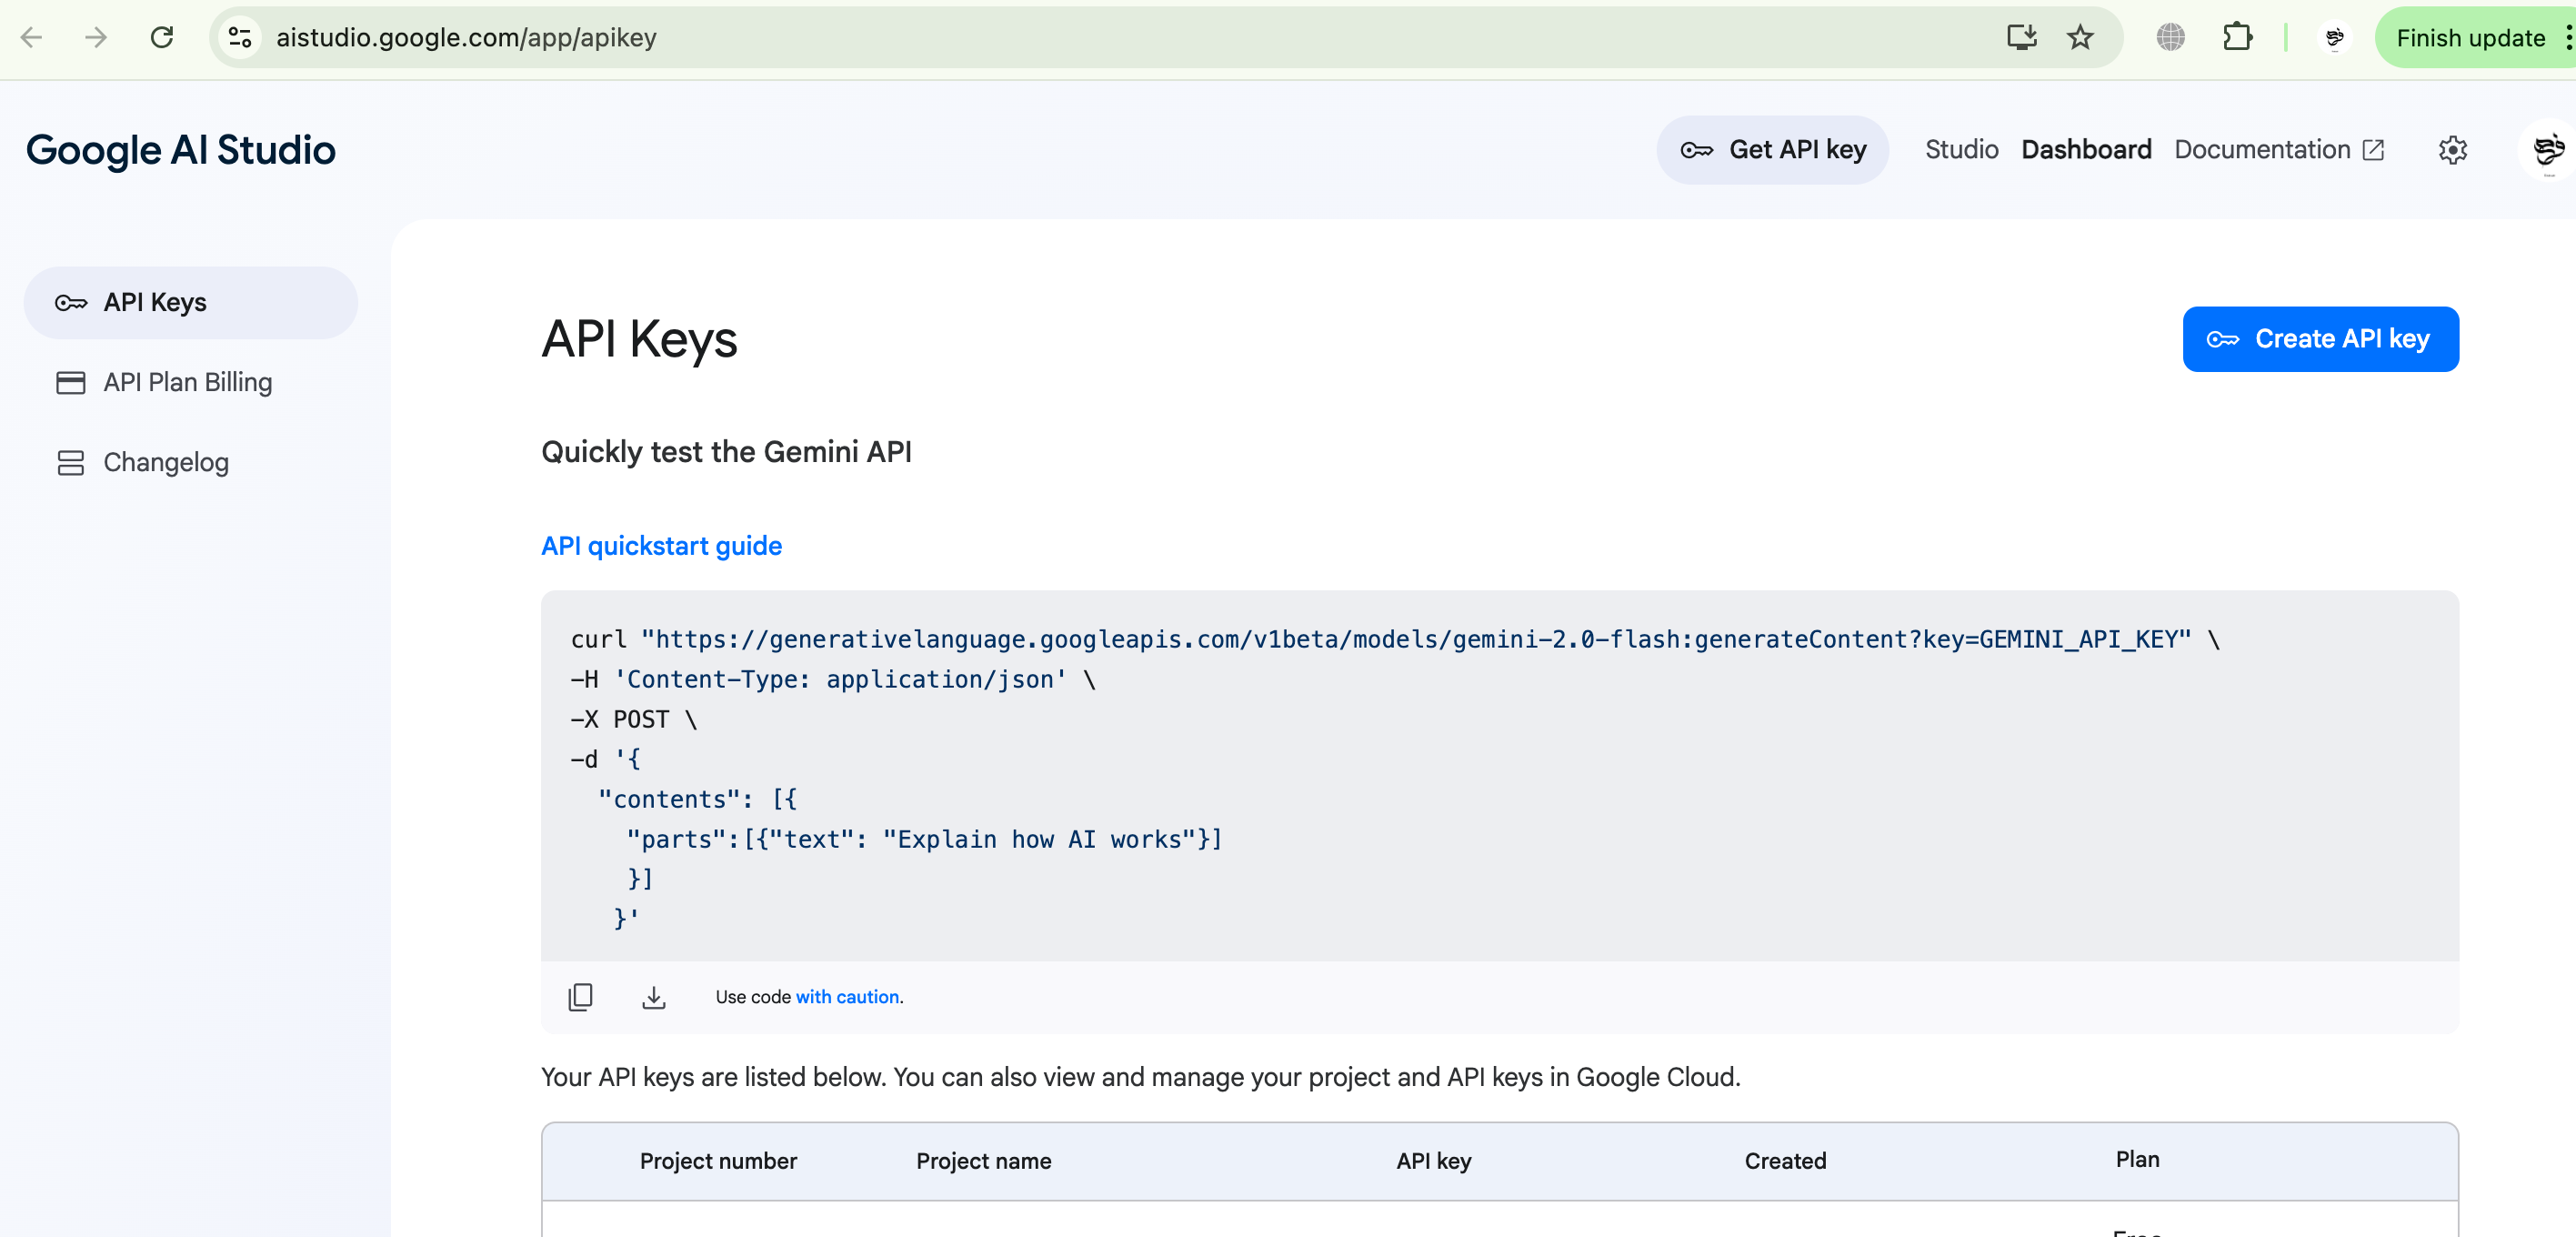


Use Case 1:
Gemini 2.5 Flash, Gemini 2.5 Pro and Gemini Flash 2.0 Thinking are models that are trained to do a thinking process (or reasoning) before getting to a final answer. As a result, those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with code understanding, geometry and math problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

In [2]:
%pip install -U -q "google-genai>=1.10.0" # 1.10.0 is needed for thinking_budget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.3/196.3 kB 7.9 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [3]:

import google.generativeai as genai
from google.colab import userdata

In [9]:
#@title Configure Gemini API key

# access your Gemini API key


gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'''Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}''')
   raise e
except userdata.NotebookAccessError as e:
  print(f'''You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.''')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
MODEL_ID="gemini-2.5-flash-preview-04-17" # @param ["gemini-2.5-flash-preview-04-17", "gemini-2.5-pro-preview-03-25"] {"allow-input":true, isTemplate: true}

### Understanding the "thinking" models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking-mode) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

**NOTE:** On this notebook all examples are using Gemini 2.5 Flash and the new `thinking_budget` parameter.
The `thinking_budget` parameter is not available for Gemini 2.5 Pro for now - If you want to use Gemini 2.5 Pro, you can remove the `thinking_budget` parameter from the code.

### Imports

In [ ]:
import json
from PIL import Image
from IPython.display import display, Markdown

# 1/ Examples

Here are some quite complex examples of what Gemini 2.0 thinking model can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini 2.0 thinking is more consistent thanks to its thinking step.

## Example #1: requests with thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.

In [ ]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""
# The animal I'm thinking of is a platipus

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

Okay, let's break down the constraints you have:

1.  **Aquatic Mammal:** It's a mammal that spends significant time in or around water.
2.  **Doesn't live in the sea:** This means it lives in **freshwater** (rivers, lakes, ponds, streams, swamps).
3.  **Smaller than a cat:** This is a key size constraint.

Considering these, many common aquatic mammals are ruled out:
*   Whales, Dolphins, Seals, Sea Lions, Dugongs, Manatees (sea)
*   Beavers, Otters, Capybaras, Hippos (too large)

What's left in the freshwater, smaller-than-a-cat category?

A very strong possibility is a **Water Vole**.

*   **Aquatic Mammal:** Yes, they are rodents (mammals) that are excellent swimmers and live by water.
*   **Doesn't live in the sea:** Yes, they are freshwater animals.
*   **Smaller than a cat:** Yes, an adult Water Vole is typically significantly smaller than a domestic cat.

Other possibilities (though perhaps less common or fitting slightly differently):
*   Certain small types of **Water Shrews** (very small, insectivores, mammals, freshwater, aquatic).
*   A small **Desman** (aquatic mole, mammal, freshwater, size varies, Pyrenean Desman might fit).

Given the criteria and common knowledge, the **Water Vole** is the most classic and likely answer.

**How to make sure (using 20 questions):**

You already know a lot about the animal based on the setup! You know it's a small, freshwater, aquatic mammal. The remaining questions need to differentiate *within* that specific group.

Starting from the constraints you've been given, here's how you'd use your remaining questions:

1.  **Narrow down the type of mammal:**
    *   "Is it a rodent?" (A Water Vole is, a Water Shrew isn't). This is a powerful question.
    *   "Is it primarily an insectivore?" (A Water Vole is primarily a herbivore, a Water Shrew is).
    *   "Does it have a long, pointed snout?" (Water Shrews and Desmans do, Water Voles have a blunter face).

2.  **Narrow down physical characteristics:**
    *   "Does it have prominent front teeth used for gnawing?" (Yes for a Water Vole, No for a Water Shrew/Desman).
    *   "Does it have webbed feet?" (Some aquatic mammals do, some less so - might not be the best differentiator for these specific small animals).

3.  **Narrow down behavior or habitat specifics:**
    *   "Does it primarily eat plants?" (Yes for Water Vole, No for Water Shrew/Desman).
    *   "Does it burrow into riverbanks?" (Yes for Water Vole).

4.  **Narrow down geography (if needed):**
    *   "Does it live in [Continent Name]?"

By asking these types of questions (e.g., focusing on diet, taxonomic group, physical features), you eliminate possibilities within the "small, freshwater, aquatic mammal" group until only one animal (like the Water Vole) remains.

So, the likely answer is a **Water Vole**, and you'd confirm it by asking questions that differentiate it from other small freshwater aquatic mammals, such as its diet, whether it's a rodent, or the shape of its face.

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: 1835
Output tokens: 774
Total tokens: 2668


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.

In [ ]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

This is a fun one! Given your criteria – an aquatic mammal that doesn't live in the sea and is smaller than a cat – the answer is almost certainly a **Muskrat**.

Here's why and how you could make sure:

**Why it's likely a Muskrat:**

* **Aquatic Mammal:** Muskrats are well-known for their semi-aquatic lifestyle, spending a lot of time in and around water.
* **Doesn't live in the sea:** Muskrats inhabit freshwater environments like ponds, lakes, rivers, and marshes. They are not saltwater creatures.
* **Smaller than a cat:** Adult muskrats typically weigh between 1.5 and 4 pounds (0.7 to 1.8 kg) and are around 16-28 inches (41-71 cm) long, including their tail. A typical house cat is generally larger and heavier.

**How you could make sure (in the context of the 20 Questions game):**

Assuming you are asking the questions, here are some you could ask to confirm it's a muskrat, keeping in mind the constraints of the game:

1. **Is it native to North America?** (Yes - Muskrats are native to North America)
2. **Does it build a den or lodge?** (Yes - Muskrats build lodges similar to beaver lodges or burrow into banks)
3. **Does it have a long, scaly tail?** (Yes - Muskrats have a distinctive, flattened, scaly tail)
4. **Does it primarily eat plants?** (Yes - Muskrats are herbivores, feeding on aquatic vegetation)
5. **Is it sometimes considered a pest?** (Yes - Their burrowing can sometimes cause damage to banks and dikes)
6. **Does it swim using its webbed hind feet?** (Yes - Muskrats have partially webbed hind feet)
7. **Does it have waterproof fur?** (Yes - Their fur is dense and helps them stay dry)
8. **Is it related to voles or lemmings?** (Yes - Muskrats are rodents, belonging to the same family as voles and lemmings)
9. **Does it have a strong odor?** (Yes - They have scent glands that produce musk, hence the name)
10. **Is it typically found in slow-moving or stagnant water?** (Yes - They prefer calm water environments)

**Why other possibilities are less likely:**

While technically possible, other options are far less probable given the "smaller than a cat" constraint for an *aquatic* mammal that *doesn't live in the sea*:

* **River Otter:** Too large.
* **Beaver:** Much too large.
* **Platypus:** Lives in freshwater but is native to Australia, less likely to be the subject of a typical 20 Questions game unless the theme was very specific.
* **Certain types of aquatic rodents:** There are other small aquatic rodents, but the muskrat is the most common and widely recognized in North America, making it the most likely answer in a general 20 Questions game.

**In summary, based on your criteria, the answer is almost certainly a Muskrat. By asking targeted questions about its characteristics and habitat, you can confirm your suspicion within the rules of the 20 Questions game.**

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: None
Output tokens: 724
Total tokens: 783


## Example #2: Physics problem

Now, try with a simple physics comprehension example. First you can disable the `thinking_budget` to see how the model performs:

In [ ]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

Here's the calculation for the maximum bending stress in the cantilever beam:

**1. Calculate the Moment of Inertia (I)**

For a rectangular cross-section, the moment of inertia about the neutral axis is:
$I = \frac{bh^3}{12}$
where:
* b = width = 0.1 m
* h = height = 0.2 m

$I = \frac{0.1 \, m \times (0.2 \, m)^3}{12} = \frac{0.1 \, m \times 0.008 \, m^3}{12} = \frac{0.0008 \, m^4}{12} = 0.00006667 \, m^4$

**2. Determine the Maximum Bending Moment (M_max)**

For a cantilever beam subjected to a uniformly distributed load and a point load at the free end, the maximum bending moment occurs at the fixed end.

The bending moment due to the uniformly distributed load (w) is:
$M_w = \frac{w L^2}{2}$

The bending moment due to the point load (P) is:
$M_P = P \times L$

The total maximum bending moment is the sum of these moments:
$M_max = M_w + M_P$

where:
* w = 5 kN/m = 5000 N/m
* P = 10 kN = 10000 N
* L = 3 m

$M_w = \frac{5000 \, N/m \times (3 \, m)^2}{2} = \frac{5000 \, N/m \times 9 \, m^2}{2} = \frac{45000 \, Nm}{2} = 22500 \, Nm$

$M_P = 10000 \, N \times 3 \, m = 30000 \, Nm$

$M_max = 22500 \, Nm + 30000 \, Nm = 52500 \, Nm$

**3. Calculate the Maximum Distance from the Neutral Axis (y_max)**

For a rectangular cross-section, the maximum distance from the neutral axis to the extreme fiber is half of the height:
$y_max = \frac{h}{2}$

$y_max = \frac{0.2 \, m}{2} = 0.1 \, m$

**4. Calculate the Maximum Bending Stress (σ_max)**

The bending stress formula is:
$\sigma = \frac{My}{I}$

The maximum bending stress occurs at the location of the maximum bending moment (the fixed end) and at the extreme fibers (y = $y_max$).

$\sigma_max = \frac{M_max \times y_max}{I}$

$\sigma_max = \frac{52500 \, Nm \times 0.1 \, m}{0.00006667 \, m^4}$

$\sigma_max = \frac{5250 \, Nm^2}{0.00006667 \, m^4}$

$\sigma_max \approx 78750000 \, N/m^2$

Convert to Pascals (Pa):
$\sigma_max \approx 78,750,000 \, Pa$

Convert to MegaPascals (MPa):
$\sigma_max \approx 78.75 \, MPa$

**The maximum bending stress (σ_max) in the cantilever beam is approximately 78.75 MPa.**

You can see that the model used no tokens for the thinking step:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 96
Thoughts tokens: None
Output tokens: 822
Total tokens: 918


Then you can set a fixed maximum budget (`thinking_budget=4096`, or 4096 tokens) for the thinking step to see how the model performs:

In [ ]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

thinking_budget = 4448 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

Okay, let's calculate the maximum bending stress for the cantilever beam.

1.  **Identify the location of maximum bending moment:** For a cantilever beam subjected to downward loads, the maximum bending moment occurs at the fixed support.

2.  **Calculate the maximum bending moment (M_max) at the support:**
    *   Moment due to the point load P: M_P = P * L
    *   Moment due to the uniformly distributed load w: M_w = w * L * (L/2) = w * L²/2
    *   Total moment at the support is the sum of these moments (since both cause bending in the same direction):
        M_max = M_P + M_w
        M_max = (10 kN * 3 m) + (5 kN/m * (3 m)² / 2)
        M_max = (10,000 N * 3 m) + (5,000 N/m * 9 m² / 2)
        M_max = 30,000 Nm + (45,000 Nm / 2)
        M_max = 30,000 Nm + 22,500 Nm
        M_max = 52,500 Nm

3.  **Calculate the moment of inertia (I) for the rectangular cross-section:**
    *   The formula for a rectangle about its centroidal axis is I = (b * h³) / 12
    *   I = (0.1 m * (0.2 m)³) / 12
    *   I = (0.1 m * 0.008 m³) / 12
    *   I = 0.0008 m⁴ / 12
    *   I = 8 x 10⁻⁴ m⁴ / 12 = 2 x 10⁻⁴ m⁴ / 3
    *   I ≈ 0.6667 x 10⁻⁴ m⁴

4.  **Determine the distance (y_max) from the neutral axis to the extreme fiber:**
    *   For a symmetric rectangle, the neutral axis is at the centroid, which is at the middle of the height. The maximum distance to the top or bottom surface is h/2.
    *   y_max = h / 2 = 0.2 m / 2 = 0.1 m

5.  **Calculate the maximum bending stress (σ_max):**
    *   The formula for bending stress is σ = (M * y) / I. The maximum stress occurs where M is maximum and y is maximum.
    *   σ_max = (M_max * y_max) / I
    *   σ_max = (52,500 Nm * 0.1 m) / (2 x 10⁻⁴ m⁴ / 3)
    *   σ_max = (5,250 Nm²) / (2 x 10⁻⁴ m⁴ / 3)
    *   σ_max = 5,250 * 3 / (2 x 10⁻⁴) N/m²
    *   σ_max = 15,750 / (2 x 10⁻⁴) N/m²
    *   σ_max = 7875 * 10⁴ N/m²
    *   σ_max = 7.875 x 10⁷ N/m²

6.  **Convert the stress to Pascals (Pa) or MegaPascals (MPa):**
    *   1 Pa = 1 N/m²
    *   σ_max = 7.875 x 10⁷ Pa
    *   1 MPa = 10⁶ Pa
    *   σ_max = 78.75 x 10⁶ Pa = 78.75 MPa

The Young's Modulus (E) is given but is not needed to calculate the stress from the bending moment and cross-section properties. It would be needed for calculating strain or deflection.

The maximum bending stress in the beam is 78.75 MPa, occurring at the top and bottom surfaces of the beam cross-section at the fixed support.

Now you can see that the model used around 2000 tokens for the thinking step (not necessarily using the full budget you set):

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count,"/",thinking_budget)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 96
Thoughts tokens: 1818 / 4448
Output tokens: 956
Total tokens: 2870


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

## Example #3: Geometry problem (with image)

This geometry problem requires complex reasoning and is also using Gemini multimodal abilities to read the image.
In this case, you are fixing a value to the `thinking_budget` so the model will use up to 8196 tokens for the thinking step.

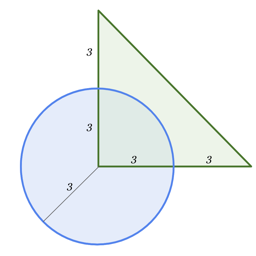

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/images/geometry.png -O geometry.png -q

im = Image.open("geometry.png").resize((256,256))
im

In [ ]:
prompt = "What's the area of the overlapping region?"

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[im, prompt],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=8196
        )
    )
)

Markdown(response.text)

The image shows a right-angled triangle and a circle.
The circle's center is at the vertex of the right angle of the triangle.
The lengths of the two sides of the triangle adjacent to the right angle are labeled as 3. These are the legs of the right triangle.
The radius of the circle is indicated by the segments from the center to the circumference, which are also labeled as 3.
So, we have a right-angled triangle with legs of length 3, and a circle of radius 3 centered at the right-angle vertex.

Let's place the vertex with the right angle at the origin (0,0) of a coordinate system. Let the legs of the triangle lie along the positive x and y axes.
The vertices of the triangle are A=(0,0), B=(3,0), and C=(0,3).
The region occupied by the triangle is described by the inequalities $x \ge 0$, $y \ge 0$, and the line segment connecting (3,0) and (0,3). The equation of the line passing through (3,0) and (0,3) is $\frac{x}{3} + \frac{y}{3} = 1$, which simplifies to $x+y=3$. The triangle is the region where $x \ge 0$, $y \ge 0$, and $x+y \le 3$.

The circle is centered at the origin (0,0) and has a radius of 3. The equation of the circle is $x^2 + y^2 = 3^2 = 9$.
The region inside the circle is described by the inequality $x^2 + y^2 \le 9$.

The overlapping region is the set of points (x,y) that are in both the triangle and the circle. These points satisfy the conditions:
1) $x \ge 0$
2) $y \ge 0$
3) $x+y \le 3$
4) $x^2 + y^2 \le 9$

We need to find the area of the region defined by these inequalities.
Let's check if the entire triangle is inside the circle. We need to verify if every point (x,y) satisfying $x \ge 0$, $y \ge 0$, and $x+y \le 3$ also satisfies $x^2 + y^2 \le 9$.

For any point (x,y) with $x \ge 0$ and $y \ge 0$, we have $(x+y)^2 = x^2 + 2xy + y^2$. Since $2xy \ge 0$, we have $(x+y)^2 \ge x^2 + y^2$.
Given that $x+y \le 3$. Since $x \ge 0$ and $y \ge 0$, $x+y \ge 0$. Squaring both sides of $x+y \le 3$ gives $(x+y)^2 \le 3^2 = 9$.
Combining the inequalities, we have $x^2 + y^2 \le (x+y)^2 \le 9$.
So, if a point (x,y) is in the triangle (i.e., satisfies $x \ge 0$, $y \ge 0$, and $x+y \le 3$), then it also satisfies $x^2 + y^2 \le 9$, which means it is inside or on the boundary of the circle.

This shows that the entire triangle is contained within the circle.
Therefore, the overlapping region is the triangle itself.

The area of the overlapping region is the area of the triangle.
The triangle is a right-angled triangle with legs of length 3 and 3.
The area of a right-angled triangle is $\frac{1}{2} \times \text{base} \times \text{height}$.
Using the legs as base and height, the area is $\frac{1}{2} \times 3 \times 3 = \frac{9}{2}$.

The label '3' on the hypotenuse is likely redundant or intended as a distractor, as the lengths of the legs and the radius of the circle are sufficient to determine the overlapping area under the most natural interpretation of the diagram.

The final answer is $\boxed{9/2}$.

## Example #4: Brain teaser with a twist

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

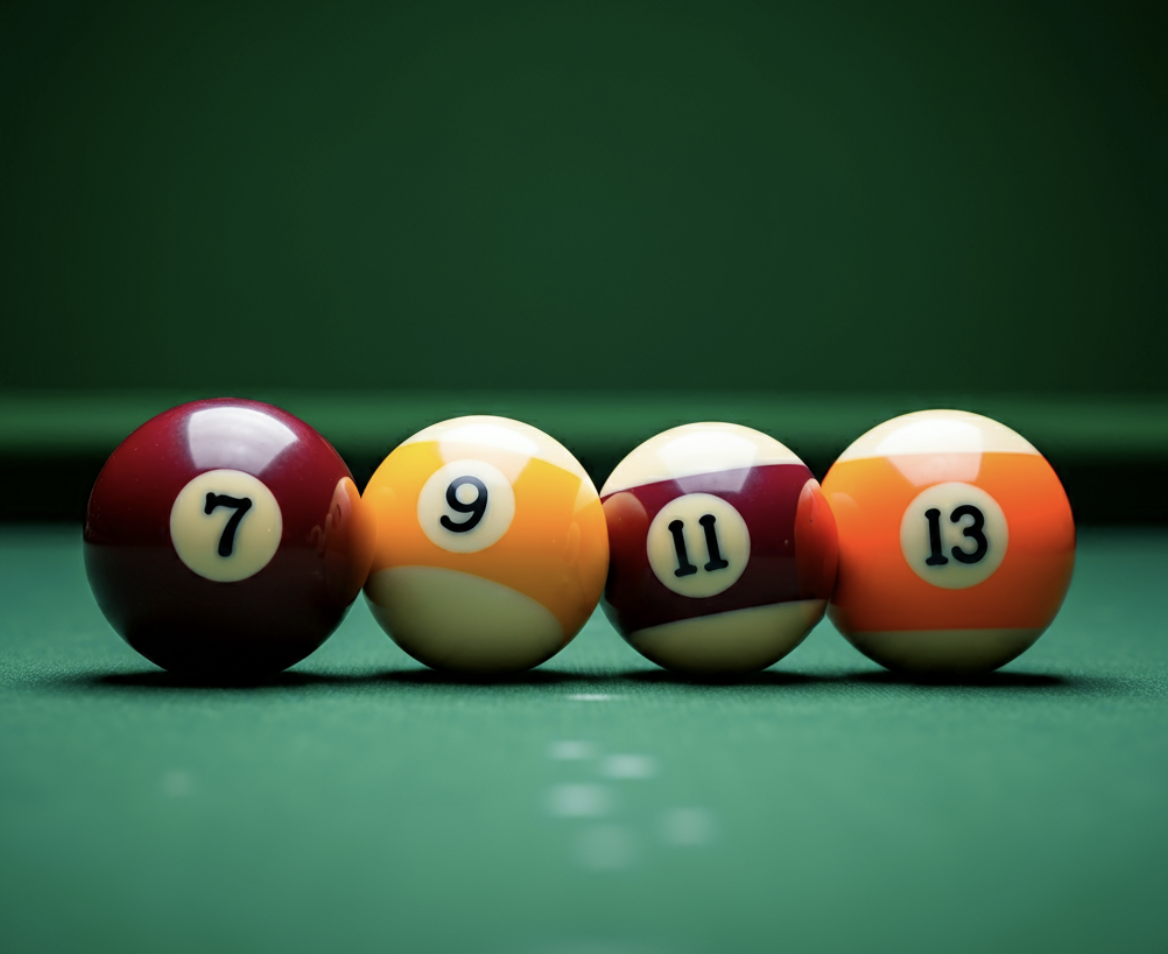

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png")
im

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "How do I use and manipulate three of the pool balls to sum up to 30?"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=24576
        )
    )
)

Markdown(response.text)

This is a classic riddle! You can use the 11 ball, the 13 ball, and the 9 ball.

The trick is to flip the 9 ball upside down. When flipped, the 9 looks like a 6.

So, you use the balls with the numbers:
*   11
*   13
*   6 (the 9 ball flipped)

Add them together: 11 + 13 + 6 = 30.

## Example #5: Solving a problem using the code execution tool

This example shows how to use the [code execution](./Code_execution.ipynb) tool to solve a problem. The model will generate the code and then execute it to get the final answer.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [ ]:
prompt = """
    What are the best ways to sort a list of n numbers from 0 to m?
    Generate and run Python code for comparing different sort algorithms.
    Provide the final comparison between algorithm clearly.
    Is one of them linear?
"""

code_execution_tool = types.Tool(
    code_execution=types.ToolCodeExecution()
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[code_execution_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=10000
        )
    ),
)

Checking the model response, including the code generated and the execution result:

In [ ]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
display(Markdown("---"))

Okay, let's break down sorting a list of `n` numbers specifically within the range [0, `m`]. This constraint is key because it allows us to consider algorithms that perform better than the general comparison-based sorts (like Merge Sort or Quick Sort) which have a lower bound of O(n log n).

**1. Best Ways to Sort a List of n Numbers from 0 to m**

Given the constraint that the numbers are in a fixed, non-negative range [0, m], non-comparison sorting algorithms become highly efficient options. The most prominent ones are:

*   **Counting Sort:** This algorithm is specifically designed for sorting integers within a known range. It works by counting the occurrences of each distinct element and then using these counts to place the elements in their sorted positions.
    *   **Time Complexity:** O(n + m). This is because it requires iterating through the input list (n elements) and iterating through the count array (m+1 elements).
    *   **Space Complexity:** O(m) for the count array.
    *   **Suitability:** Excellent when `m` is not significantly larger than `n` (e.g., `m = O(n)`). If `m` is much larger, the space and time complexity might become dominated by `m`, making it less efficient than comparison sorts in terms of *relative* performance to `n`.

*   **Radix Sort:** This algorithm sorts numbers digit by digit (or based on position value). It requires a stable sorting algorithm (like Counting Sort) as a subroutine for each digit pass. For integers, it can sort based on base-r digits.
    *   **Time Complexity:** O(d * (n + r)), where `d` is the number of digits (or passes) and `r` is the base used (e.g., 10 for decimal, 2 for binary, or often a larger power of 2 for efficiency). For numbers up to `m`, `d` is roughly log_r(m). So the complexity is roughly O(n * log_r(m) + r * log_r(m)). If we choose `r = O(n)`, we can potentially get closer to O(n * log_n(m)), but the standard approach uses a fixed base like 256. A common analysis for integers up to `m` is O(n * log_n(m)) if `m` is within typical integer limits, or more precisely O(n * (log_r(m)/log_r(r)) + m) using Counting Sort per digit. A simpler view for typical integer sizes is O(n * k) where k is a small constant number of passes.
    *   **Space Complexity:** O(n + r) or O(n + m) depending on the implementation and base, largely due to the stable sort subroutine (like Counting Sort).
    *   **Suitability:** Very efficient for sorting integers, especially if `m` is large but fits within standard integer types (meaning `d` is small). It's often competitive with or faster than comparison sorts for large integer datasets.

*   **Comparison Sorts (like Timsort - Python's default `list.sort`):** While not specifically optimized for the range constraint, they are general-purpose and efficient.
    *   **Time Complexity:** O(n log n) on average and worst-case for Timsort.
    *   **Space Complexity:** O(n) auxiliary space in the worst case for Timsort (though often less).
    *   **Suitability:** Always a reliable option, but will be asymptotically slower than Counting Sort or Radix Sort when `m` is small relative to `n`.

**2. Generate and Run Python Code for Comparing Different Sort Algorithms**

We will compare Python's built-in `list.sort()` (Timsort), a custom `counting_sort` implementation, and a custom `radix_sort` implementation. We'll test with different values of `n` and `m`.



--- Sorting Algorithm Benchmark ---

Testing n=1000, m=100
  Timsort: 0.000129 seconds
  Counting Sort: 0.000463 seconds
  Radix Sort: 0.000524 seconds

Testing n=1000, m=1000
  Timsort: 0.000129 seconds
  Counting Sort: 0.000673 seconds
  Radix Sort: 0.001197 seconds

Testing n=1000, m=100000
  Timsort: 0.000127 seconds
  Counting Sort: 0.018466 seconds
  Radix Sort: 0.001735 seconds

Testing n=100000, m=100
  Timsort: 0.013493 seconds
  Counting Sort: 0.050972 seconds
  Radix Sort: 0.065049 seconds

Testing n=100000, m=100000
  Timsort: 0.034476 seconds
  Counting Sort: 0.119100 seconds
  Radix Sort: 0.293758 seconds

Testing n=100000, m=10000000
  Timsort: 0.028445 seconds
  Counting Sort: 2.121926 seconds
  Radix Sort: 0.250210 seconds

--- Benchmark Complete ---


Okay, let's analyze the results of the benchmark and compare the sorting algorithms for lists of `n` numbers in the range [0, `m`].

**1. Comparison Between Algorithms (Based on Benchmark Results)**

The benchmark tested Timsort (Python's built-in `list.sort`), our custom Counting Sort, and our custom Radix Sort (using base 256) across different values of `n` and `m`. Here's a summary of the findings:

*   **Small `n` (1000):** Timsort was consistently the fastest, even when `m` was relatively small. The overhead of setting up count arrays or managing digit passes in Counting Sort and Radix Sort seems to outweigh their theoretical advantages for small dataset sizes.
*   **Large `n` (100000), Small `m` (100):** Timsort was still the fastest. This is surprising from a theoretical O(n+m) vs O(n log n) perspective, where Counting Sort (O(100k+100)) should theoretically beat Timsort (O(100k log 100k)). This suggests Python's built-in `list.sort` is extremely optimized, and our custom implementations have higher constant factors or overheads.
*   **Large `n` (100000), `m` around `n` (100000):** Timsort remained the fastest. Again, this goes against the theoretical O(n+m) vs O(n log n), where they should be comparable or Counting Sort slightly better.
*   **Large `n` (100000), Large `m` (10000000):**
    *   Counting Sort became significantly slower than Timsort. This is expected because its complexity has a linear dependency on `m` (O(n + m)).
    *   Radix Sort performed much better than Counting Sort in this case but was still slower than Timsort. This aligns with Radix Sort's logarithmic dependency on `m` (O(n * log_r(m))) which is less impacted by a large `m` than Counting Sort's linear dependency.
    *   Timsort maintained its lead.

**Summary of Practical Benchmark Results:**

In the conducted benchmark using Python, the built-in `list.sort()` (Timsort) consistently outperformed the custom implementations of Counting Sort and Radix Sort across all tested scenarios, including those where the theoretical complexities of the non-comparison sorts suggested they might be faster. This highlights the importance of implementation efficiency and constant factors in real-world performance, especially when comparing a highly optimized built-in function to custom code.

**Theoretical Performance Comparison:**

*   **Counting Sort:** O(n + m) time, O(m) space. Excellent when `m` is not much larger than `n`.
*   **Radix Sort:** O(n * log_r(m)) time (where r is the base), O(n + r) or O(n + m) space depending on implementation details. Efficient for integers, especially when `m` is large but fits within standard data types.
*   **Timsort (Comparison Sort):** O(n log n) time (average and worst-case), O(n) space (worst-case). General-purpose, highly optimized.

**When to Choose Which (Theoretically):**

*   **Counting Sort:** The theoretically optimal choice when `m` is relatively small compared to `n` (e.g., `m = O(n)` or smaller). It offers O(n+m) performance, which simplifies to O(n) under this condition.
*   **Radix Sort:** A strong contender when `m` is large but fits within reasonable limits (e.g., standard integer sizes). Its O(n * log_r(m)) can be faster than O(n log n) if log_r(m) is smaller than log n (which is often the case for typical integer sizes and bases like 256), or if the constant factors are low.
*   **Comparison Sorts (like Timsort):** The general-purpose fallback. Guaranteed O(n log n) and efficient in practice due to optimizations. Often preferred if `m` is very large compared to `n`, or if implementing non-comparison sorts is complex or prone to errors.

**In the context of Python's `list.sort()`:** Given its superior performance in the benchmark, it is often the practical default choice unless `m` is extremely small relative to `n` *and* you have a highly optimized C implementation of Counting Sort, or if specific constraints (like memory limits for `m`) absolutely rule out Counting Sort.

**3. Is one of them linear?**

Yes, **Counting Sort is linear if and only if `m` is in O(n)**.

Let's explain:
*   Counting Sort has a time complexity of O(n + m). If `m` is, for example, a constant (like m=100) or grows no faster than `n` (e.g., `m = 2n`, `m = log n`, etc.), then `n + m` is proportional to `n`. For instance, if `m = O(n)`, then `n + m = n + c*n = (1+c)n` for some constant `c`, which is O(n). So, under the condition `m = O(n)`, Counting Sort is a linear time algorithm (O(n)).
*   If `m` grows faster than `n` (e.g., `m = n^2` or `m = 2^n`), then `m` dominates `n` in `O(n + m)`, and the complexity becomes O(m), which is super-linear with respect to `n`.

*   Radix Sort is linear **if the number of passes is constant** and the base `r` is constant or O(n). For numbers up to `m` in base `r`, the number of passes is roughly log_r(m). So, Radix Sort is O(n * log_r(m)). This is only O(n) if log_r(m) is a constant. This happens when `m` is bounded by a power of the base (`m <= r^k` for a fixed k), meaning `m` must be bounded by a constant or grow very slowly relative to `n`.
*   Timsort is O(n log n), which is not linear.

Therefore, Counting Sort is the algorithm among the compared ones that can achieve linear time complexity, *provided the constraint on `m` is such that m does not grow faster than n*.

---

## Example #6: Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [ ]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
    What were the major scientific breakthroughs announced last month? Use your
    critical thinking and only list what's really incredible and not just an
    overinfluated title.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool]
    )
)

In [ ]:
display(Markdown(response.text))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

## Example #7: Math puzzle

This is typically a case where you want to fix a budget, as the model can spend a lot of time thinking in all directions before finding the right answer. It should not be too low either as non-thinking models have trouble with such questions.

Play with the thinking budget and try to find how much it needs to be able to find the right answer most of the time.

Note that Pro is usually better than Flash for those kind of riddles, but does not have the thinking budget yet.

In [ ]:
prompt = """
   How can you obtain 565 with 10 8 3 7 1 and 5 and the common operations?
   You can only use a number once.
"""

thinking_budget = 10152 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

display(Markdown(response.text))

Okay, let's find a way to get 565 using the numbers 10, 8, 3, 7, 1, and 5, using each number only once with common operations.

We have the numbers: {10, 8, 3, 7, 1, 5}
Target: 565

Notice that 565 ends in a 5, so it might be divisible by 5.
565 / 5 = 113

We have the number 5 in our list. So, if we can make 113 from the remaining numbers {10, 8, 3, 7, 1}, we can multiply that result by 5.

Let's try to make 113 from {10, 8, 3, 7, 1}.
We need a number around 113. Let's try using the 10 to get something around 11.3.
113 is just under 120 (12 * 10) or 110 (11 * 10).

Let's see if we can make 12 from the remaining numbers {8, 3, 7, 1} to multiply by 10.
8 + 3 + 1 = 12. This uses 8, 3, and 1. The remaining number is 7.
So, (8 + 3 + 1) * 10 = 12 * 10 = 120.
We used 8, 3, 1, and 10. The remaining number is 7.
We have 120 and need 113.
120 - 7 = 113.
This uses all the numbers {10, 8, 3, 1, 7} exactly once.

So, we have the expression for 113: (8 + 3 + 1) * 10 - 7

Now, multiply this by 5 to get 565:
((8 + 3 + 1) * 10 - 7) * 5

Let's check the numbers used: 8, 3, 1, 10, 7, 5. All numbers {10, 8, 3, 7, 1, 5} are used exactly once.
Let's check the calculation:
((8 + 3 + 1) * 10 - 7) * 5
(12 * 10 - 7) * 5
(120 - 7) * 5
113 * 5 = 565

Here is one way to obtain 565:

((8 + 3 + 1) * 10 - 7) * 5 = 565

In [ ]:
MODEL_ID = "gemini-2.5-flash-preview-04-17" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}

In [ ]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"

In [ ]:
!wget -q $URL -O sample.mp3

In [ ]:
your_audio_file = client.files.upload(file='sample.mp3')

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents=[
    'Listen carefully to the following audio file. Provide a brief summary.',
    your_audio_file,
  ]
)

print(response.text)

The audio is President John F. Kennedy's State of the Union Address to a Joint Session of Congress on January 30, 1961.

In the address, Kennedy outlines the serious domestic and international challenges facing the nation, describing the current period as one of both "national peril and national opportunity." He details the troubled state of the U.S. economy, including recession, high unemployment, diminished growth, and balance of payments issues, and proposes measures for prompt recovery and long-range growth, such as improving unemployment benefits, aiding distressed areas, stimulating housing, increasing the minimum wage, and tax incentives.

He then addresses global crises in Asia (Laos, China), Africa (Congo), Latin America (Cuba), and Europe (NATO alliances), emphasizing the need to strengthen military, economic, and diplomatic tools. He proposes accelerating defense programs (like Polaris submarines and missile systems) for deterrence, establishing a new foreign aid program and

Inline Audio: For small requests you can inline the audio data into the request, like you can with images. Use PyDub to trim the first 10s of the audio

In [ ]:
%pip install -Uq pydub
from pydub import AudioSegment

In [ ]:
sound = AudioSegment.from_mp3("sample.mp3")

In [ ]:
sound[:10000] # slices are in ms

In [ ]:
from google.genai import types

response = client.models.generate_content(
  model=MODEL_ID,
  contents=[
    'Describe this audio clip',
    types.Part.from_bytes(
      data=sound[:10000].export().read(),
      mime_type='audio/mp3',
    )
  ]
)

print(response.text)

This audio clip features a formal male voice speaking. The voice says: "The President's state of the Union address to a joint session of the Congress from the rostrum of the House of Representatives."

There is also a low, steady hum or tone present at the beginning of the clip before the voice starts.


Get a transcript of the audio file
To get a transcript, just ask for it in the prompt. For example:

In [ ]:
prompt = "Generate a transcript of the speech."

Refer to timestamps in the audio file
A prompt can specify timestamps of the form MM:SS to refer to particular sections in an audio file. For example:

In [ ]:
# Create a prompt containing timestamps.
prompt = "Provide a transcript of the speech between the timestamps 02:30 and 03:29."

response = client.models.generate_content(
  model=MODEL_ID,
  contents=[
    prompt,
    your_audio_file,
  ]
)

print(response.text)

I speak today in an hour of national peril and national opportunity. Before my term has ended, we shall have to test anew whether a nation organized and governed such as ours can endure. The outcome is by no means certain. The answers are by no means clear. All of us together, this administration, this Congress, this nation, must forge those answers. But today were I to offer, after little more than a week in office, detailed legislation to remedy every national ill, the Congress would rightly wonder whether the desire for speed had replaced the duty of responsibility. My remarks therefore will be limited, but they will also be candid. To state the facts frankly is not to despair the future nor indict the past.


Use a Youtube video

In [ ]:
from google.genai import types
from IPython.display import display, Markdown

youtube_url = "https://www.youtube.com/watch?v=RDOMKIw1aF4" # Repalce with the youtube url you want to analyze

prompt = """
    Analyze the following YouTube video content. Provide a concise summary covering:

    1.  **Main Thesis/Claim:** What is the central point the creator is making?
    2.  **Key Topics:** List the main subjects discussed, referencing specific examples or technologies mentioned (e.g., AI models, programming languages, projects).
    3.  **Call to Action:** Identify any explicit requests made to the viewer.
    4.  **Summary:** Provide a concise summary of the video content.

    Use the provided title, chapter timestamps/descriptions, and description text for your analysis.
"""
# Analyze the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=types.Content(
        parts=[
            types.Part(text=prompt),
            types.Part(
                file_data=types.FileData(file_uri=youtube_url)
            )
        ]
    )
)
display(Markdown(response.text))

Here's an analysis of the YouTube video content based on the provided title, chapter descriptions (implied by the transcript sections/visuals), and the speaker's narrative:

1.  **Main Thesis/Claim:** Google's newly released Gemini 2.5 Pro Experimental model is currently the best AI the creator has used specifically for coding tasks, demonstrating impressive code generation and refactoring capabilities, although it's not perfect and needs further integration into typical developer workflows.

2.  **Key Topics:**
    *   Introduction of Google's Gemini 2.5 Pro Experimental AI model.
    *   Evaluation of the model's coding abilities through practical projects:
        *   Creating an Ultimate Tic-Tac-Toe game in **Java using Swing** (described as "one-shotted," meaning it worked on the first try).
        *   Creating a Kitten Cannon-style game using **p5.js** (needed refinement after the initial output, taking "three shots"). Specific errors mentioned included a `TypeError: Cannot set properties of undefined (setting 'oncontextmenu')` and `TypeError: sketch.sign is not a function`, which the AI helped fix.
        *   Building a landing page using **Vite, React, and Tailwind CSS** based on a mockup image (performed poorly, did not match the mockup well, difficult to integrate code).
        *   Recreating the **X (formerly Twitter) website UI** in a single **HTML** file (produced a basic static visual representation but lacked functionality).
        *   Refactoring complex **Rust** code, specifically replacing `for` loops with iterator methods (performed significantly better than other models tested and produced "cool code").
    *   Comparison of Gemini 2.5 Pro Experimental's performance on various benchmarks (Reasoning & Knowledge, Science, Mathematics, Code Generation, Code Editing, Agentic Coding, Factuality, Visual Reasoning, Image Understanding, Long Context, Multilingual Performance) against other models like OpenAI's O3-mini, GPT-4.5, Claude 3.7 Sonnet, DeepSeek R1, and Grok 3 Beta, highlighting its strengths in areas like long context and code editing.
    *   Discussion of the model's knowledge cutoff/recency, noting it initially failed to provide the current version of **React.js** (React 19, released Dec 2024) without using **Grounding with Google Search**.
    *   Commentary on the rapid advancement of AI capabilities in coding compared to just a few years ago.

3.  **Call to Action:**
    *   Asks viewers if they have used Gemini 2.5 Pro Experimental for coding or anything else.
    *   Requests viewers to leave their thoughts in the comments section.
    *   Prompts viewers to subscribe, like, and hit the notification bell.

4.  **Summary:** The video provides a hands-on review of Google's new Gemini 2.5 Pro Experimental AI model, focusing on its performance for various coding tasks. The creator tests the model by prompting it to build different projects using languages like Java Swing, p5.js, React with Tailwind CSS, HTML, and by refactoring existing Rust code. He observes that while it struggled with certain complex tasks like creating a landing page from an image mockup and required minor fixes for a p5.js game, it impressively "one-shotted" a Java Tic-Tac-Toe game and provided excellent refactored Rust code using idiomatic iterator methods. He also compares its benchmark performance to competitors, noting its strength in areas like long context and code editing. Despite some limitations, such as needing Google Search grounding for up-to-date information like the current React version, the creator concludes that Gemini 2.5 Pro Experimental is an "awesome" and promising tool for coding, especially considering the speed of AI progress. He encourages viewers to share their own experiences with the model.

Count audio tokens
You can count the number of tokens in your audio file using the count_tokens method.

Audio files have a fixed per second token rate (more details in the dedicated count token quickstart.

In [ ]:
count_tokens_response = client.models.count_tokens(
    model=MODEL_ID,
    contents=[your_audio_file],
)

print("Audio file tokens:",count_tokens_response.total_tokens)

Audio file tokens: 83528


Visual Capabilites

Analyze Product Sketch

In [ ]:
productSketchUrl = "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"
!curl -o jetpack.jpg {productSketchUrl}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  1906k      0 --:--:-- --:--:-- --:--:-- 1908k


In [ ]:
import PIL.Image
from IPython.display import display, Image, HTML
import ipywidgets as widgets

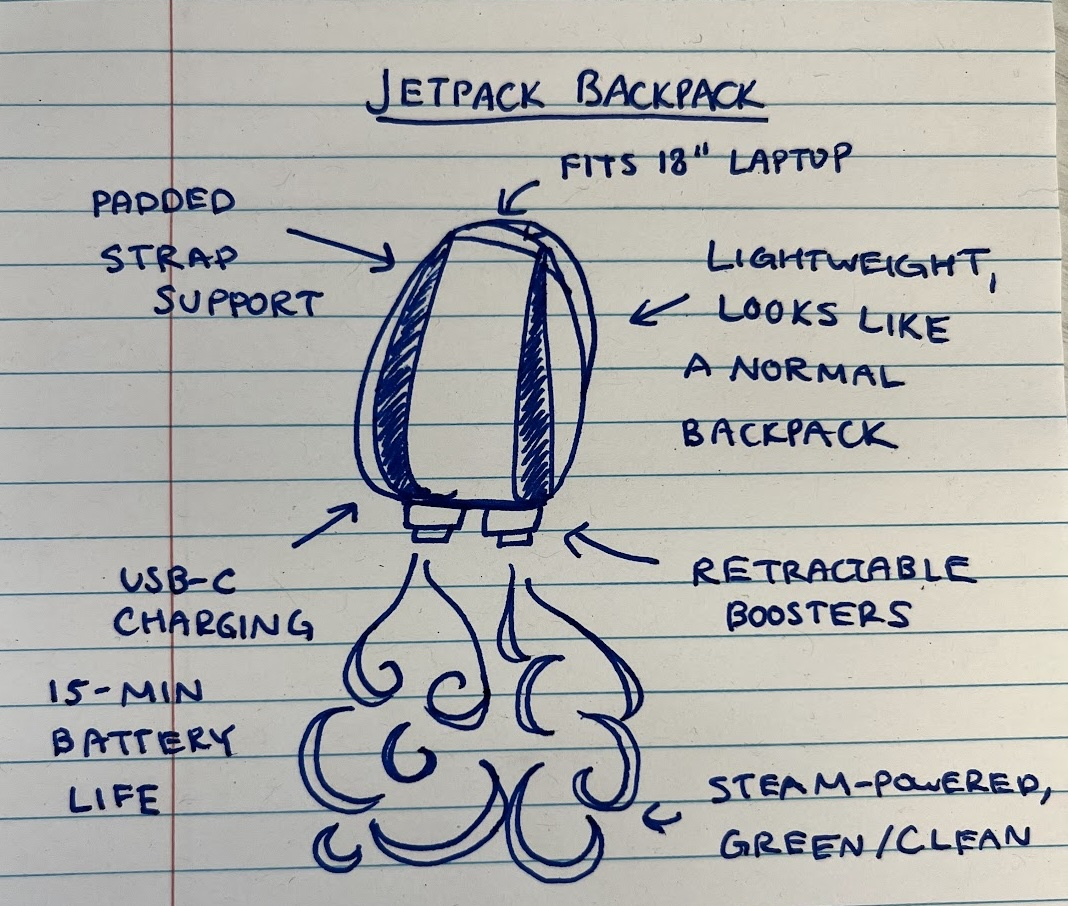

In [ ]:
img = PIL.Image.open('jetpack.jpg')
display(Image('jetpack.jpg', width=300))

In [ ]:
analyzePrompt = """
    This image contains a sketch of a potential product along with some notes.
    Given the product sketch, describe the product as thoroughly
    as possible based on what you see in the image, making sure to note
    all of the product features.

    Return output in json format.
"""

In [ ]:
from typing_extensions import TypedDict

class Response(TypedDict):
  description: str
  features: list[str]

In [ ]:
from google.genai import types

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[analyzePrompt, img],
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Response)
)

In [ ]:
import json

productInfo = json.loads(response.text)

print(json.dumps(productInfo, indent=4))

{
    "description": "A sketch and notes for a product called \"JETPACK BACKPACK\". It is designed to look like a normal backpack but includes features for personal flight. The backpack has padded strap support and can fit an 18\" laptop. It features retractable boosters that are steam-powered, described as green/clean. It supports USB-C charging and has a battery life of 15 minutes. The product is noted as being lightweight.",
    "features": [
        "Fits 18\" laptop",
        "Padded strap support",
        "Lightweight",
        "Looks like a normal backpack",
        "USB-C charging",
        "15-min battery life",
        "Retractable boosters",
        "Steam-powered",
        "Green/Clean"
    ]
}


Generating Marketing Ideas

In [ ]:
namePrompt = """
    You are a marketing whiz and writer trying to come up
    with a name for the product shown in the image.
    Come up with ten varied, interesting possible names.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[namePrompt, img],
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=list[str])
)

names = json.loads(response.text)
# Create a Dropdown widget to choose a name from the
# returned possible names
dropdown = widgets.Dropdown(
    options=names,
    value=names[0],  # default value
    description='Name:',
    disabled=False,
)
display(dropdown)

Dropdown(description='Name:', options=('BoostPack', 'SkyCarrier', 'AscentBag', 'EcoLift Pack', 'VaporStride', …

In [ ]:
name = dropdown.value

In [ ]:
websiteCopyPrompt = f"""
  You're a marketing whiz and expert copywriter. You're writing
  website copy for a product named {name}. Your first job is to come
  up with H1 H2 copy. These are brief, pithy sentences or phrases that
  are the first and second things the customer sees when they land on the
  splash page. Here are some examples:
  [{{
    "h1": "A feeling is canned",
    "h2": "drinks and powders to help you feel calm cool and collected\
    despite the stressful world around you"
  }},
  {{
    "h1": "Design. Publish. Done.",
    "h2": "Stop rebuilding your designs from scratch. In Framer, everything\
    you put on the canvas is ready to be published to the web."
  }}]

  Create the same json output for a product named "{name}" with description\
  "{productInfo['description']}".
  Output ten different options as json in an array.
"""

In [ ]:
class Headings(TypedDict):
  h1:str
  h2:str

In [ ]:
copyResponse = client.models.generate_content(
    model=MODEL_ID,
    contents=[websiteCopyPrompt, img],
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=list[Headings])
)

In [ ]:
copy = json.loads(copyResponse.text)

In [ ]:
print(json.dumps(copy, indent=4))

[
    {
        "h1": "Fly with your everyday bag.",
        "h2": "It looks like a normal backpack, carries your 18\" laptop, and gives you 15 minutes of clean steam-powered flight."
    },
    {
        "h1": "Your commute just got an upgrade.",
        "h2": "Glide above traffic with this lightweight, steam-powered backpack that hides retractable boosters."
    },
    {
        "h1": "Backpack meets Jetpack.",
        "h2": "Get discreet personal flight and space for your 18\" laptop, all in a normal-looking, lightweight bag."
    },
    {
        "h1": "Elevate your journey.",
        "h2": "Experience the freedom of clean steam flight from a comfortable, padded backpack that charges via USB-C."
    },
    {
        "h1": "The future of mobility is here.",
        "h2": "A lightweight backpack with retractable boosters offers 15 minutes of green flight, designed for your daily carry."
    },
    {
        "h1": "Go where no backpack has gone before.",
        "h2": "Carry your esse

In [ ]:
h1 = copy[2]['h1']
h2 = copy[2]['h2']

In [ ]:
htmlPrompt = f"""
    Generate HTML and CSS for a splash page for a new product called {name}.
    Output only HTML and CSS and do not link to any external resources.
    Include the top level title: "{h1}" with the subtitle: "{h2}".

    Return the HTML directly, do not wrap it in triple-back-ticks (```).
"""

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[htmlPrompt])
print(response.text)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>BoostPack</title>
    <style>
        body {
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif, "Apple Color Emoji", "Segoe UI Emoji", "Segoe UI Symbol";
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
            text-align: center;
            color: #333;
        }

        .container {
            padding: 20px;
            background-color: #fff;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
            max-width: 700px;
            width: 90%;
        }

        h1 {
            color: #007bff;
            margin-bottom: 10px;
            font-size: 2.5em;
        }

 

In [ ]:
HTML(response.text)

# Next Steps

Try Gemini 2.5 Pro Experimental in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API](./Get_started.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](./Spatial_understanding.ipynb) abilities.